This project is based on SMS Spam detection classification . I will be using the multinomial Naive Bayes implementation.This particular classifier is suitable for classification with discrete features (such as in our case, word counts for text classification). It takes in integer word counts as its input.On the other hand Gaussian Naive Bayes is better suited for continuous data as it assumes that the input data has a Gaussian(normal) distribution.



## Importing the necessary libraries
we start our project by importing the neccessary libraries

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import nltk

## Preparation of Dataset
The dataset we have used for this project is downloaded from Kaggle here is a link to the dataset:https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset

In [ ]:
import pandas
df_sms = pd.read_csv('/content/drive/MyDrive/filename/spam.csv%3FX-Goog-Algorithm=GOOG4-RSA-SHA256&X-Goog-Credential=gcp-kaggle-com@kaggle-161607.iam.gserviceaccount.com%2F20230122%2Fauto%2Fstorage%2Fgoog4_request&X-Goog-Date=20230122T221323Z&X-Goog-Expires=259200&X.csv',encoding='latin-1')
df_sms.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df_sms.isna()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,False,False,True,True,True
1,False,False,True,True,True
2,False,False,True,True,True
3,False,False,True,True,True
4,False,False,True,True,True
...,...,...,...,...,...
5567,False,False,True,True,True
5568,False,False,True,True,True
5569,False,False,True,True,True
5570,False,False,True,True,True


We are going to drop  the unwanted columns Unnamed:2, Unnamed: 3 and Unnamed:4 as a process of cleaning our dataset.

In [ ]:
df_sms = df_sms.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
df_sms = df_sms.rename(columns={"v1":"label", "v2":"sms"})
df_sms.head()

,label,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Before we proceed we can check the length of our sms.

In [ ]:
print(len(df_sms))

5572


Number of observations in each label spam and ham

In [ ]:
df_sms.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [ ]:
df_sms.describe()

,label,sms
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [ ]:
df_sms['length'] = df_sms['sms'].apply(len)
df_sms.head()

,label,sms,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


## Data Visualization

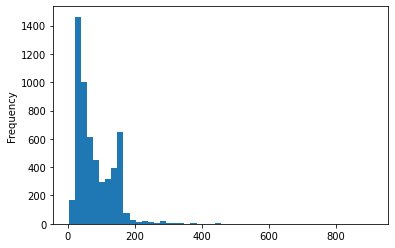

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df_sms['length'].plot(bins=50, kind='hist');

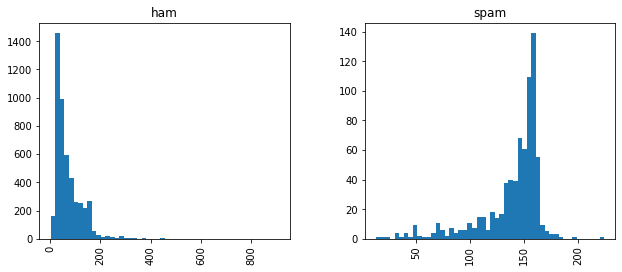

In [ ]:
df_sms.hist(column='length', by='label', bins=50,figsize=(10,4));

We classify our data into 1 and 0 where ham is 0 and spam is 1

In [ ]:
df_sms.loc[:,'label'] = df_sms.label.map({'ham':0, 'spam':1})
print(df_sms.shape)
df_sms.head()

(5572, 3)


,label,sms,length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


## Bag of Words Approach
Our dataset contains 5,572 rows of text data, which is not suitable for most machine learning algorithms as they require numerical input. To address this, we can use the bag-of-words model to extract features from the text and convert it into a numerical representation. This process involves tokenizing the words in each observation and calculating the frequency of each token. The result is a matrix with each document as a row, each word as a column, and the corresponding (row,column) values representing the frequency of each word in that document.
To handle this, we will be using sklearns count vectorizer method which does the following:

1. It tokenizes the string(separates the string into individual words) and gives an integer ID to each token.
2. It counts the occurrence of each of those tokens.



## Implementation of our Bag of Words Approach
Step 1: Convert all strings to their lower case form

In [14]:
documents = ['Hello, how are you!',
             'Win prizes, win from home.',
             'Call me asap.',
             'Hello, Call  you tomorrow?']

lower_case_documents = []
lower_case_documents = [d.lower() for d in documents]
print(lower_case_documents)

['hello, how are you!', 'win prizes, win from home.', 'call me asap.', 'hello, call  you tomorrow?']


Step 2: Removing all punctuations

In [15]:
sans_punctuation_documents = []
import string

for i in lower_case_documents:
    sans_punctuation_documents.append(i.translate(str.maketrans("","", string.punctuation)))
    
sans_punctuation_documents

['hello how are you',
 'win prizes win from home',
 'call me asap',
 'hello call  you tomorrow']

Step 3: Tokenization

In [16]:
preprocessed_documents = [[w for w in d.split()] for d in sans_punctuation_documents]
preprocessed_documents

[['hello', 'how', 'are', 'you'],
 ['win', 'prizes', 'win', 'from', 'home'],
 ['call', 'me', 'asap'],
 ['hello', 'call', 'you', 'tomorrow']]

Step 4: Count frequencies

In [17]:
frequency_list = []
import pprint
from collections import Counter

frequency_list = [Counter(d) for d in preprocessed_documents]
pprint.pprint(frequency_list)

[Counter({'hello': 1, 'how': 1, 'are': 1, 'you': 1}),
 Counter({'win': 2, 'prizes': 1, 'from': 1, 'home': 1}),
 Counter({'call': 1, 'me': 1, 'asap': 1}),
 Counter({'hello': 1, 'call': 1, 'you': 1, 'tomorrow': 1})]


## Implementing Bag of Words in scikit-learn
Here we will look to create a frequency matrix on a smaller document set to make sure we understand how the document-term matrix generation happens. We have created a sample document set ‘documents’.

documents = [‘Hello, how are you!’, ‘Win prizes, win from home.’, ‘Call me asap.’, ‘Hello, Call  you tomorrow?’]

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
count_vector = CountVectorizer()

## Data preprocessing with CountVectorizer()
In above step, we implemented a version of the CountVectorizer() method from scratch that entailed cleaning our data first.

This cleaning involved converting all of our data to lower case and removing all punctuation marks.

CountVectorizer() has certain parameters which take care of these steps for us. They are:

lowercase = True

The lowercase parameter has a default value of True which converts all of our text to its lower case form.

token_pattern = (?u)\b\w\w+\b
The token_pattern parameter has a default regular expression value of (?u)\b\w\w+\b which ignores all punctuation marks and treats them as delimiters, while accepting alphanumeric strings of length greater than or equal to 2, as individual tokens or words.

## Stop_words
The stop_words parameter, if set to english will remove all words from our document set that match a list of English stop words which is defined in scikit-learn.

Considering the size of our dataset and the fact that we are dealing with SMS messages and not larger text sources like e-mail, we will not be setting this parameter value.

In [19]:
count_vector.fit(documents)
count_vector.get_feature_names()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['are',
 'asap',
 'call',
 'from',
 'hello',
 'home',
 'how',
 'me',
 'prizes',
 'tomorrow',
 'win',
 'you']

In [20]:
doc_array = count_vector.transform(documents).toarray()
doc_array

array([[1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 2, 0],
       [0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1]])

In [21]:
frequency_matrix = pd.DataFrame(doc_array, columns = count_vector.get_feature_names())
frequency_matrix

,are,asap,call,from,hello,home,how,me,prizes,tomorrow,win,you
0,1,0,0,0,1,0,1,0,0,0,0,1
1,0,0,0,1,0,1,0,0,1,0,2,0
2,0,1,1,0,0,0,0,1,0,0,0,0
3,0,0,1,0,1,0,0,0,0,1,0,1


In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_sms['sms'], 
                                                    df_sms['label'],test_size=0.20, 
                                                    random_state=42)

In [24]:
# Instantiate the CountVectorizer method
count_vector = CountVectorizer()

# Fit the training data and then return the matrix
training_data = count_vector.fit_transform(X_train)

# Transform testing data and return the matrix. 
testing_data = count_vector.transform(X_test)

## Implementation of Naive Bayes Machine Learning Algorithm 
I will use sklearns sklearn.naive_bayes method to make predictions on our dataset for SMS Spam Detection.
Specifically, we will be using the multinomial Naive Bayes implementation. This particular classifier is suitable for classification with discrete features. It takes in integer word counts as its input.

On the other hand Gaussian Naive Bayes is better suited for continuous data as it assumes that the input data has a Gaussian(normal) distribution.

In [25]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB()
naive_bayes.fit(training_data,y_train)


MultinomialNB()

In [26]:
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

MultinomialNB()

In [27]:
predictions = naive_bayes.predict(testing_data)

## Evaluating our SMS Spam Detection Model
Now that we have made predictions on our test set, our next goal is to evaluate how well our model is doing. There are various mechanisms for doing so, but first we can have a recap of them.

* Accuracy measures how often the classifier makes the correct prediction. It’s the ratio of the number of correct predictions to the total number of predictions (the number of test data points).

* Precision tells us what proportion of messages we classified as spam, actually were spam. It is a ratio of true positives(words classified as spam, and which are actually spam) to all positives(all words classified as spam, irrespective of whether that was the correct classification), in other words it is the ratio of [True Positives/(True Positives + False Positives)]
* Recall(sensitivity) tells us what proportion of messages that actually were spam were classified by us as spam. It is a ratio of true positives(words classified as spam, and which are actually spam) to all the words that were actually spam, in other words it is the ratio of

[True Positives/(True Positives + False Negatives)]

For classification problems that are skewed in their classification distributions like in our case, for example if we had a 100 text messages and only 2 were spam and the rest 98 weren’t, accuracy by itself is not a very good metric.

We could classify 90 messages as not spam(including the 2 that were spam but we classify them as not spam, hence they would be false negatives) and 10 as spam(all 10 false positives) and still get a reasonably good accuracy score.
For such cases, precision and recall come in very handy. These two metrics can be combined to get the F1 score, which is weighted average of the precision and recall scores. This score can range from 0 to 1, with 1 being the best possible F1 score.

We will be using all 4 metrics to make sure our model does well. For all 4 metrics whose values can range from 0 to 1, having a score as close to 1 as possible is a good indicator of how well our model is doing.

In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy score: {}'.format(accuracy_score(y_test, predictions)))
print('Precision score: {}'.format(precision_score(y_test, predictions)))
print('Recall score: {}'.format(recall_score(y_test, predictions)))
print('F1 score: {}'.format(f1_score(y_test, predictions)))

Accuracy score: 0.9838565022421525
Precision score: 0.9852941176470589
Recall score: 0.8933333333333333
F1 score: 0.9370629370629371


we can deduce that our precision score gives us the highest percentage in terms of evaluating our model and generally our model has a good accuraccy percentage showing how our model is performing.